In [1]:
import pandas as pd
df = pd.read_csv('listings.csv', sep=',')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.shape

(50246, 106)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50246 entries, 0 to 50245
Columns: 106 entries, id to reviews_per_month
dtypes: float64(21), int64(21), object(64)
memory usage: 40.6+ MB


In [4]:
df_missing = df.isna()
df_missing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df_num_missing = df_missing.sum()
df_num_missing

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               18
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               11030
Length: 106, dtype: int64

In [6]:
missing_percentage = df_num_missing / len(df)

In [7]:
missing_percentage

id                                              0.000000
listing_url                                     0.000000
scrape_id                                       0.000000
last_scraped                                    0.000000
name                                            0.000358
                                                  ...   
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_shared_rooms     0.000000
reviews_per_month                               0.219520
Length: 106, dtype: float64

In [8]:
df_new = list(zip(df.columns, missing_percentage))

In [9]:
type(df_new)

list

In [10]:
df_new

[('id', 0.0),
 ('listing_url', 0.0),
 ('scrape_id', 0.0),
 ('last_scraped', 0.0),
 ('name', 0.0003582374716395335),
 ('summary', 0.049516379413286626),
 ('space', 0.283206623412809),
 ('description', 0.025315447995860368),
 ('experiences_offered', 0.0),
 ('neighborhood_overview', 0.3497591848107312),
 ('notes', 0.6015205190462922),
 ('transit', 0.3455001393145723),
 ('access', 0.47554034151972296),
 ('interaction', 0.40484814711618833),
 ('house_rules', 0.39766349560163994),
 ('thumbnail_url', 1.0),
 ('medium_url', 1.0),
 ('picture_url', 0.0),
 ('xl_picture_url', 1.0),
 ('host_id', 0.0),
 ('host_url', 0.0),
 ('host_name', 0.00021892289933527048),
 ('host_since', 0.00021892289933527048),
 ('host_location', 0.0029256060183895237),
 ('host_about', 0.401106555745731),
 ('host_response_time', 0.43708951956374636),
 ('host_response_rate', 0.43708951956374636),
 ('host_acceptance_rate', 0.29405325797078374),
 ('host_is_superhost', 0.00021892289933527048),
 ('host_thumbnail_url', 0.00021892289

In [11]:
dropl = []
for c, p in df_new:
    if p>0.05:
        dropl.append(c)

In [12]:
dropl

['space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'jurisdiction_names',
 'reviews_per_month']

In [14]:
drop0 = dropl[:22]+dropl[29:]
drop0

['space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'license',
 'jurisdiction_names',
 'reviews_per_month']

In [15]:
for col in df.columns:
    print(col, df[col].unique())

id [    2060     2595     3831 ... 43366411 43366638 43366674]
listing_url ['https://www.airbnb.com/rooms/2060' 'https://www.airbnb.com/rooms/2595'
 'https://www.airbnb.com/rooms/3831' ...
 'https://www.airbnb.com/rooms/43366411'
 'https://www.airbnb.com/rooms/43366638'
 'https://www.airbnb.com/rooms/43366674']
scrape_id [20200506054410]
last_scraped ['2020-05-09' '2020-05-08' '2020-05-07' '2020-05-10' '2020-05-06']
name ['Modern NYC' 'Skylit Midtown Castle' 'Cozy Entire Floor of Brownstone'
 ... 'Beautiful New apartment in Sunnyside'
 "★☆Sunnyside☆★ Locals' favorite neighbor for living"
 '★☆Sunnyside☆★ Locals favorite neighbor for living']
summary [nan
 'Beautiful, spacious skylit studio in the heart of Midtown, Manhattan.  STUNNING SKYLIT STUDIO / 1 BED + SINGLE / FULL BATH / FULL KITCHEN / FIREPLACE / CENTRALLY LOCATED / WiFi + APPLE TV / SHEETS + TOWELS'
 "Urban retreat: enjoy 500 s.f. floor in 1899 brownstone, with wood and ceramic flooring throughout, roomy bdrm, & upgraded kitch

host_is_superhost ['f' 't' nan]
host_thumbnail_url ['https://a0.muscache.com/im/users/2259/profile_pic/1259094383/original.jpg?aki_policy=profile_small'
 'https://a0.muscache.com/im/pictures/user/50fc57af-a6a3-4e88-8f16-efd6cac7c9bc.jpg?aki_policy=profile_small'
 'https://a0.muscache.com/im/users/4869/profile_pic/1371927771/original.jpg?aki_policy=profile_small'
 ...
 'https://a0.muscache.com/im/pictures/user/af83a2af-9d7a-4935-9aa7-d6c972bd5840.jpg?aki_policy=profile_small'
 'https://a0.muscache.com/im/pictures/user/ae6bfdf2-231e-4dd7-a3c6-fd396aede5ce.jpg?aki_policy=profile_small'
 'https://a0.muscache.com/im/pictures/user/ab98847e-7bb6-4505-8029-711d6a163d7d.jpg?aki_policy=profile_small']
host_picture_url ['https://a0.muscache.com/im/users/2259/profile_pic/1259094383/original.jpg?aki_policy=profile_x_medium'
 'https://a0.muscache.com/im/pictures/user/50fc57af-a6a3-4e88-8f16-efd6cac7c9bc.jpg?aki_policy=profile_x_medium'
 'https://a0.muscache.com/im/users/4869/profile_pic/1371927771/o

reviews_per_month [1.000e-02 3.800e-01 4.660e+00 5.800e-01 3.530e+00 9.100e-01 1.240e+00
 1.570e+00 5.000e-01 1.340e+00 9.200e-01 2.100e-01 1.360e+00 1.820e+00
 1.780e+00       nan 7.000e-02 1.150e+00 6.200e-01 8.600e-01 2.500e-01
 2.020e+00 2.290e+00 6.100e-01 1.390e+00 2.070e+00 1.710e+00 2.040e+00
 8.500e-01 4.000e-01 2.320e+00 5.200e-01 1.000e-01 1.130e+00 1.160e+00
 7.400e-01 3.130e+00 2.000e-01 8.900e-01 1.500e-01 2.570e+00 3.100e-01
 6.500e-01 4.700e-01 1.270e+00 2.200e-01 1.550e+00 1.200e-01 4.880e+00
 1.450e+00 1.680e+00 4.300e-01 1.470e+00 1.030e+00 1.800e-01 1.700e-01
 1.250e+00 1.650e+00 6.300e-01 4.000e-02 5.400e-01 3.410e+00 1.440e+00
 1.080e+00 6.600e-01 1.600e-01 3.000e-01 2.130e+00 2.910e+00 7.300e-01
 1.400e+00 3.500e-01 1.640e+00 1.900e-01 3.080e+00 2.700e-01 1.100e-01
 3.890e+00 3.750e+00 1.040e+00 2.980e+00 1.970e+00 8.000e-02 2.330e+00
 8.200e-01 1.720e+00 3.000e-02 3.820e+00 2.210e+00 7.700e-01 9.000e-02
 2.100e+00 7.200e-01 2.900e-01 2.300e-01 6.000e-01 1.120e+0

In [16]:
# experiences_offered all none. has_availability all t

airbnb_df = df.drop(columns=drop0+['experiences_offered', 'host_location','calendar_updated','has_availability',\
                                  'host_url','listing_url','picture_url','host_thumbnail_url','host_picture_url',\
                                  'scrape_id', 'last_scraped','summary', 'description','id', 'name', 'host_name', \
                                   'host_id','host_listings_count', 'host_verifications','street', 'neighbourhood',\
                                   'neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'state', \
                                   'zipcode',  'market','smart_location', 'country_code', 'country', 'latitude', \
                                   'longitude', 'minimum_minimum_nights', 'maximum_minimum_nights',\
                                   'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', \
                                   'maximum_nights_avg_ntm', 'availability_30', 'availability_60','availability_90',\
                                   'availability_365', 'number_of_reviews_ltm','review_scores_rating',\
                                   'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',\
                                   'review_scores_communication','review_scores_location', 'amenities',\
                                   'calculated_host_listings_count_entire_homes','guests_included',\
                                   'calculated_host_listings_count_private_rooms','calculated_host_listings_count',\
                                   'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped',\
                                  'requires_license','is_business_travel_ready'])
airbnb_df.shape

(50246, 23)

In [17]:
airbnb = airbnb_df.dropna()
airbnb.shape

(37966, 23)

In [18]:
airbnb.columns

Index(['host_since', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_value',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [19]:
airbnb[:10]

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,...,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
1,2008-09-09,f,6.0,t,t,f,Apartment,Entire home/apt,2,1.0,...,$225.00,$0.00,3,1125,48,9.0,f,strict_14_with_grace_period,t,t
2,2008-12-07,f,1.0,t,t,t,Guest suite,Entire home/apt,3,1.0,...,$89.00,$0.00,1,730,318,8.0,f,moderate,f,f
3,2009-02-02,f,1.0,t,f,f,Apartment,Entire home/apt,2,1.0,...,$200.00,$100.00,3,21,78,9.0,f,moderate,t,t
5,2009-03-03,f,1.0,t,f,t,Apartment,Private room,2,1.0,...,$79.00,$12.00,2,14,473,9.0,f,strict_14_with_grace_period,f,f
6,2009-02-05,f,1.0,t,t,t,Apartment,Private room,1,1.0,...,$79.00,$0.00,2,14,118,10.0,f,flexible,t,t
7,2009-02-07,t,4.0,t,t,t,Apartment,Entire home/apt,2,1.0,...,$150.00,$10.00,1,1125,161,9.0,f,strict_14_with_grace_period,f,f
8,2009-02-16,t,1.0,t,t,t,Apartment,Private room,2,1.0,...,$99.00,$0.00,2,7,213,10.0,f,flexible,t,t
9,2009-02-22,f,1.0,t,t,t,Apartment,Entire home/apt,2,1.0,...,$160.00,$25.00,3,21,66,10.0,f,moderate,f,f
10,2009-03-10,t,3.0,t,t,t,Townhouse,Private room,2,1.5,...,$89.00,$22.00,4,20,180,10.0,f,strict_14_with_grace_period,t,f
11,2009-03-27,f,2.0,t,f,t,Apartment,Private room,1,1.0,...,$85.00,$40.00,2,730,123,9.0,f,strict_14_with_grace_period,f,f


In [19]:
pd.set_option('display.max_columns', None)

In [20]:
airbnb.dtypes

host_since                           object
host_is_superhost                    object
host_total_listings_count           float64
host_has_profile_pic                 object
host_identity_verified               object
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
price                                object
extra_people                         object
minimum_nights                        int64
maximum_nights                        int64
number_of_reviews                     int64
review_scores_value                 float64
instant_bookable                     object
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification

In [21]:
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'])
rt = pd.to_datetime('2019-09-12')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
airbnb['host_days'] = rt - airbnb['host_since']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
airbnb[:5]

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_days
1,2008-12-07,f,1.0,t,t,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,$89.00,$0.00,1,730,279,9.0,f,moderate,f,f,3931 days
3,2009-02-02,f,1.0,t,f,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$200.00,$100.00,3,21,75,9.0,f,moderate,t,t,3874 days
5,2009-03-03,f,1.0,t,f,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$79.00,$12.00,2,14,443,8.0,f,strict_14_with_grace_period,f,f,3845 days
6,2009-02-05,f,1.0,t,t,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,$79.00,$0.00,2,14,118,10.0,f,flexible,t,t,3871 days
7,2009-02-06,f,1.0,t,t,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$116.00,$15.00,30,365,94,9.0,f,strict_14_with_grace_period,f,f,3870 days


In [24]:
airbnb['property_type'].value_counts()

Apartment                 29443
House                      3243
Townhouse                  1418
Condominium                1155
Loft                       1154
Guest suite                 337
Serviced apartment          279
Hotel                       124
Boutique hotel              124
Other                        78
Bed and breakfast            54
Hostel                       51
Guesthouse                   46
Resort                       39
Bungalow                     32
Villa                        26
Tiny house                   19
Camper/RV                    11
Aparthotel                    9
Cottage                       7
Boat                          7
Earth house                   5
Houseboat                     5
Tent                          5
Cabin                         1
Farm stay                     1
Casa particular (Cuba)        1
Island                        1
Dome house                    1
Castle                        1
Nature lodge                  1
Barn    

In [25]:
def recoding(value):
    if value not in ['House', 'Apartment']:
        return 'Other'
    return value

airbnb['property_type'] = airbnb['property_type'].apply(recoding)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
airbnb['property_type'].value_counts()

Apartment    29443
Other         4994
House         3243
Name: property_type, dtype: int64

In [27]:
airbnb['n_host_days'] =  airbnb['host_days'].dt.days

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
airbnb = airbnb.drop(columns='host_since')
airbnb = airbnb.drop(columns='host_days')

In [29]:
airbnb['cancellation_policy'].value_counts()

strict_14_with_grace_period    18647
moderate                        9926
flexible                        9062
super_strict_30                   20
super_strict_60                   20
strict                             5
Name: cancellation_policy, dtype: int64

In [30]:
airbnb['room_type'].value_counts()

Entire home/apt    19587
Private room       16986
Shared room          826
Hotel room           281
Name: room_type, dtype: int64

In [31]:
airbnb['bed_type'].value_counts()

Real Bed         37065
Futon              239
Pull-out Sofa      208
Airbed             119
Couch               49
Name: bed_type, dtype: int64

In [32]:
def recoding2(value):
    if value not in ['moderate', 'flexible']:
        return 'strict'
    return value

airbnb['cancellation_policy'] = airbnb['cancellation_policy'].apply(recoding2)

In [33]:
airbnb[:5]

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,n_host_days
1,f,1.0,t,t,t,Other,Entire home/apt,3,1.0,1.0,4.0,Real Bed,$89.00,$0.00,1,730,279,9.0,f,moderate,f,f,3931
3,f,1.0,t,f,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$200.00,$100.00,3,21,75,9.0,f,moderate,t,t,3874
5,f,1.0,t,f,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$79.00,$12.00,2,14,443,8.0,f,strict,f,f,3845
6,f,1.0,t,t,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,$79.00,$0.00,2,14,118,10.0,f,flexible,t,t,3871
7,f,1.0,t,t,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$116.00,$15.00,30,365,94,9.0,f,strict,f,f,3870


In [34]:
airbnb['price'] = airbnb['price'].str.replace('$', '')
airbnb['price'] = airbnb['price'].str.replace(',', '')
airbnb['price'] = airbnb['price'].astype(float)
airbnb['extra_people'] = airbnb['extra_people'].str.replace('$', '')
airbnb['extra_people'] = airbnb['extra_people'].str.replace(',', '')
airbnb['extra_people'] = airbnb['extra_people'].astype(float)

In [35]:
colist = airbnb.select_dtypes('object')


In [36]:
for column in colist:
    oh = pd.get_dummies(airbnb[column],prefix=[column], drop_first = True)
    airbnb = airbnb.join(oh)
    airbnb = airbnb.drop(column, axis =1)

In [37]:
airbnb[:5]

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_value,n_host_days,['host_is_superhost']_t,['host_has_profile_pic']_t,['host_identity_verified']_t,['is_location_exact']_t,['property_type']_House,['property_type']_Other,['room_type']_Hotel room,['room_type']_Private room,['room_type']_Shared room,['bed_type']_Couch,['bed_type']_Futon,['bed_type']_Pull-out Sofa,['bed_type']_Real Bed,['instant_bookable']_t,['cancellation_policy']_moderate,['cancellation_policy']_strict,['require_guest_profile_picture']_t,['require_guest_phone_verification']_t
1,1.0,3,1.0,1.0,4.0,89.0,0.0,1,730,279,9.0,3931,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,1.0,2,1.0,1.0,1.0,200.0,100.0,3,21,75,9.0,3874,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
5,1.0,2,1.0,1.0,1.0,79.0,12.0,2,14,443,8.0,3845,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
6,1.0,1,1.0,1.0,1.0,79.0,0.0,2,14,118,10.0,3871,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
7,1.0,2,1.0,1.0,1.0,116.0,15.0,30,365,94,9.0,3870,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [38]:
airbnb.shape

(37680, 30)

In [39]:
airbnb_label = airbnb['review_scores_value']

airbnb_target = airbnb_label.to_frame()
airbnb_dummy = airbnb[airbnb.columns[12:30]]

In [40]:
airbnb_dummy[:5]

,['host_is_superhost']_t,['host_has_profile_pic']_t,['host_identity_verified']_t,['is_location_exact']_t,['property_type']_House,['property_type']_Other,['room_type']_Hotel room,['room_type']_Private room,['room_type']_Shared room,['bed_type']_Couch,['bed_type']_Futon,['bed_type']_Pull-out Sofa,['bed_type']_Real Bed,['instant_bookable']_t,['cancellation_policy']_moderate,['cancellation_policy']_strict,['require_guest_profile_picture']_t,['require_guest_phone_verification']_t
1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
5,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
6,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
7,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [41]:
airbnb = airbnb.drop(airbnb.columns[10: 30], axis=1)

In [42]:
from scipy import stats
import numpy as np
from scipy.stats import mstats

In [43]:
def winsorize_s(s):
    q = s.quantile([0.01, 0.99])
    if isinstance(q, pd.Series) and len(q) == 2:
        s[s < q.iloc[0]] = q.iloc[0]
        s[s > q.iloc[1]] = q.iloc[1]
    return s

def winsorize_ab(df):
    return df.apply(winsorize_s, axis=0)

winsorize_ab(airbnb)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/p

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews
1,1.0,3,1.0,1.0,4.0,89.0,0.0,1,730,236
3,1.0,2,1.0,1.0,1.0,200.0,100.0,3,21,75
5,1.0,2,1.0,1.0,1.0,79.0,12.0,2,14,236
6,1.0,1,1.0,1.0,1.0,79.0,0.0,2,14,118
7,1.0,2,1.0,1.0,1.0,116.0,15.0,30,365,94
...,...,...,...,...,...,...,...,...,...,...
48094,8.0,2,2.0,1.0,0.0,85.0,85.0,1,1125,1
48095,8.0,2,2.0,1.0,2.0,85.0,85.0,1,1125,1
48097,8.0,2,2.0,1.0,2.0,85.0,85.0,1,1125,2
48144,1.0,2,1.0,1.0,1.0,99.0,0.0,1,30,1


In [44]:
airbnb[:5]

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews
1,1.0,3,1.0,1.0,4.0,89.0,0.0,1,730,236
3,1.0,2,1.0,1.0,1.0,200.0,100.0,3,21,75
5,1.0,2,1.0,1.0,1.0,79.0,12.0,2,14,236
6,1.0,1,1.0,1.0,1.0,79.0,0.0,2,14,118
7,1.0,2,1.0,1.0,1.0,116.0,15.0,30,365,94


In [45]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(airbnb)
scaled_features_airbnb = pd.DataFrame(scaled_features, index=airbnb.index, columns=airbnb.columns)

In [48]:
airbnb_scaled = scaled_features_airbnb.join(airbnb_dummy)
airbnb_scaled[:5]

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,['host_is_superhost']_t,['host_has_profile_pic']_t,['host_identity_verified']_t,['is_location_exact']_t,['property_type']_House,['property_type']_Other,['room_type']_Hotel room,['room_type']_Private room,['room_type']_Shared room,['bed_type']_Couch,['bed_type']_Futon,['bed_type']_Pull-out Sofa,['bed_type']_Real Bed,['instant_bookable']_t,['cancellation_policy']_moderate,['cancellation_policy']_strict,['require_guest_profile_picture']_t,['require_guest_phone_verification']_t
1,-0.232345,0.070495,-0.371801,-0.246669,2.411096,-0.447871,-0.751020,-0.535777,0.280567,4.490302,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,-0.232345,-0.504825,-0.371801,-0.246669,-0.549380,0.632163,4.089066,-0.282692,-1.048786,0.978093,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
5,-0.232345,-0.504825,-0.371801,-0.246669,-0.549380,-0.545172,-0.170210,-0.409235,-1.061911,4.490302,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
6,-0.232345,-1.080145,-0.371801,-0.246669,-0.549380,-0.545172,-0.751020,-0.409235,-1.061911,1.916137,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
7,-0.232345,-0.504825,-0.371801,-0.246669,-0.549380,-0.185160,-0.025007,3.133955,-0.403797,1.392577,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(airbnb_scaled, airbnb_label, test_size=0.33\
                                                    , random_state=42)

In [50]:
X_train.shape

(25245, 28)

In [51]:
y_train.shape

(25245,)

In [52]:
airbnb_scaled.to_csv('airbnb_scaled.csv', sep='\t', encoding='utf-8', index=False)
airbnb_target.to_csv('airbnb_target.csv', sep='\t', encoding='utf-8', index=False )

In [53]:
# Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV, cross_val_predict
kf = KFold(n_splits=8, shuffle = False , random_state=42)

model = LinearRegression()
results = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
results

lr = model.fit(X_train, y_train)

In [67]:
am_results = cross_val_score(model, X_train, y_train, cv=kf)
am_predictions = cross_val_predict(model, X_test, y_test, cv=kf)

In [69]:
print(am_results)
print(am_predictions)
y_test_all = y_test.reset_index(drop=True)
am_error= y_test_all - predictions
rmse_am_test = math.sqrt(sum(np.square(am_error))/len(am_error))
rmse_am_test

[0.10543186 0.07445687 0.07914684 0.09379557 0.06118777 0.06789742
 0.08326904 0.07394107]
[9.24952968 9.2470269  9.25362842 ... 9.45497748 9.12846658 9.48519929]


0.9065702192616468

In [71]:
print(results)

[-0.78204272 -0.7050624  -0.68818324 -0.71895207 -0.77547535 -0.76102642
 -0.82333138 -0.75593403]


In [72]:
import statistics
import math
rmse_lr = math.sqrt(abs(statistics.mean(results)))

In [73]:
rmse_lr

0.8667473390195272

In [74]:
predictions = lr.predict(X_test)

In [75]:
y_test_n = y_test.reset_index(drop=True)

In [76]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predictions')

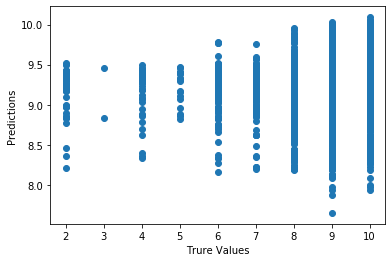

In [77]:
plt.scatter(y_test_n, predictions)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')

(array([2.000e+00, 1.000e+01, 6.900e+01, 9.000e+01, 1.710e+02, 7.950e+02,
        4.280e+03, 4.642e+03, 1.856e+03, 5.200e+02]),
 array([ 7.65301072,  7.89665776,  8.14030479,  8.38395183,  8.62759886,
         8.8712459 ,  9.11489293,  9.35853997,  9.60218701,  9.84583404,
        10.08948108]),
 <a list of 10 Patch objects>)

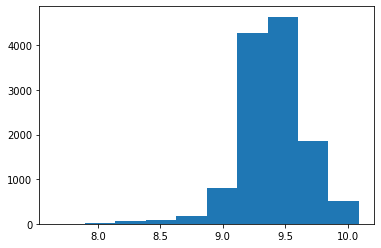

In [78]:
plt.hist(predictions)

In [79]:
error= y_test_n - predictions


In [80]:
rmse_lr_test = math.sqrt(sum(np.square(error))/len(error))
rmse_lr_test

0.9065702192616468

In [81]:
# Liner Regression with Ridge penalty

In [107]:
from sklearn.linear_model import ElasticNet
cv = kf
model_rr = ElasticNet(alpha=0.1, l1_ratio = 0.3)
results_rr = cross_val_score(model_rr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
results_rr

array([-0.82796656, -0.72518827, -0.71160305, -0.7542017 , -0.793608  ,
       -0.7815587 , -0.85646883, -0.77724891])

In [108]:
rmse_rr = math.sqrt(abs(statistics.mean(results_rr)))
rmse_rr

0.8823154206564505

In [109]:
rr = model_rr.fit(X_train, y_train)

In [110]:
predictions_rr = rr.predict(X_test)

Text(0, 0.5, 'Predictions')

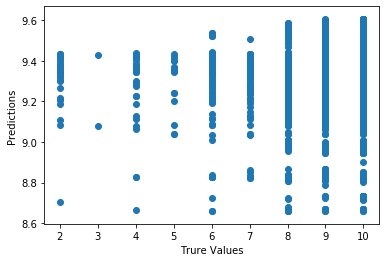

In [111]:
plt.scatter(y_test, predictions_rr)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')

(array([  50.,   60.,   16.,   84.,  103.,  392.,  609., 6589., 2178.,
        2354.]),
 array([8.6596231 , 8.75420775, 8.8487924 , 8.94337705, 9.0379617 ,
        9.13254635, 9.227131  , 9.32171565, 9.4163003 , 9.51088495,
        9.6054696 ]),
 <a list of 10 Patch objects>)

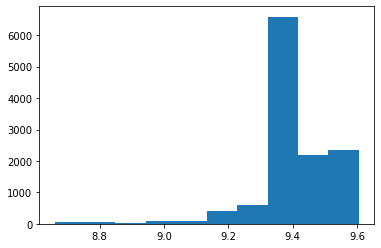

In [112]:
plt.hist(predictions_rr)

In [113]:
error_rr= y_test_n - predictions_rr
rmse_rr_test = math.sqrt(sum(np.square(error_rr))/len(error_rr))
rmse_rr_test

0.9196771773123137

In [89]:
# Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
num_trees = 100
cv = kf
model_rf = RandomForestRegressor(n_estimators=num_trees, max_features=5, random_state=42)
results_rf = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
results_rf

array([-0.77005287, -0.74209878, -0.69796076, -0.71807267, -0.790225  ,
       -0.77840912, -0.82102695, -0.7632046 ])

In [91]:
rmse_rf = math.sqrt(abs(statistics.mean(results_rf)))
rmse_rf

0.8718551170601418

In [92]:
rf = model_rf.fit(X_train, y_train)

In [93]:
predictions_rf = rf.predict(X_test)

Text(0, 0.5, 'Predictions')

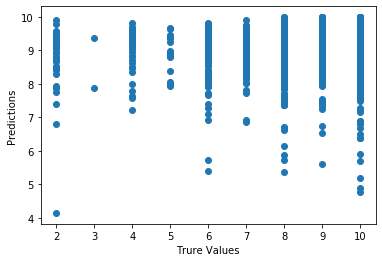

In [94]:
plt.scatter(y_test, predictions_rf)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')

(array([1.000e+00, 3.000e+00, 7.000e+00, 5.000e+00, 1.600e+01, 3.800e+01,
        1.050e+02, 5.240e+02, 5.106e+03, 6.630e+03]),
 array([ 4.13 ,  4.717,  5.304,  5.891,  6.478,  7.065,  7.652,  8.239,
         8.826,  9.413, 10.   ]),
 <a list of 10 Patch objects>)

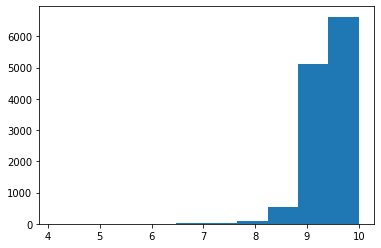

In [95]:
plt.hist(predictions_rf)

In [96]:
error_rf= y_test_n - predictions_rf
rmse_rf_test = math.sqrt(sum(np.square(error_rf))/len(error_rf))
rmse_rf_test

0.9058386693950026

In [97]:
# Gradient Boost Regressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
cv = kf
model_gbt = GradientBoostingRegressor(n_estimators= 100, max_depth=5, learning_rate=0.1, random_state =42)
results_gbt = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
results_gbt

array([-0.78204272, -0.7050624 , -0.68818324, -0.71895207, -0.77547535,
       -0.76102642, -0.82333138, -0.75593403])

In [99]:
rmse_gbt = math.sqrt(abs(statistics.mean(results_gbt)))
rmse_gbt

0.8667473390195272

In [100]:
gbt = model_gbt.fit(X_train, y_train)

In [101]:
predictions_gbt = gbt.predict(X_test)

Text(0, 0.5, 'Predictions')

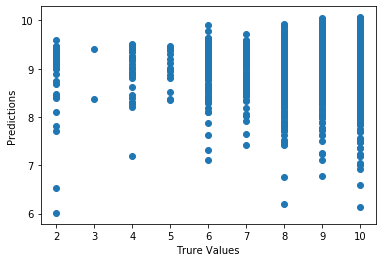

In [102]:
plt.scatter(y_test, predictions_gbt)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')

(array([3.000e+00, 4.000e+00, 8.000e+00, 2.200e+01, 4.100e+01, 1.260e+02,
        4.210e+02, 2.346e+03, 7.313e+03, 2.151e+03]),
 array([ 6.00733712,  6.41395889,  6.82058065,  7.22720242,  7.63382419,
         8.04044595,  8.44706772,  8.85368949,  9.26031126,  9.66693302,
        10.07355479]),
 <a list of 10 Patch objects>)

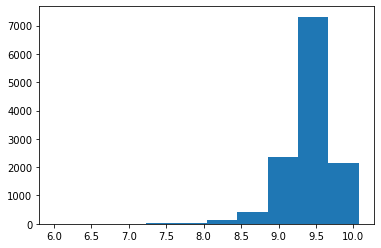

In [103]:
plt.hist(predictions_gbt)

In [104]:
error_gbt= y_test_n - predictions_gbt
rmse_gbt_test = math.sqrt(sum(np.square(error_gbt))/len(error_gbt))
rmse_gbt_test

0.8972516818673373

In [130]:
# Grid Search for ElaticNet
from sklearn.model_selection import GridSearchCV

model_rr = ElasticNet()
param_grid= {'alpha':[0, 0.001, 0.01, 0.1, 1], 'l1_ratio':[0,0.1,0.2,0.5,0.8]}
grid_rr = GridSearchCV(model_rr, param_grid, cv=cv, scoring='neg_mean_squared_error')


In [131]:
grid_rr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8221.988714879259, tolerance: 1.7860349947937875
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8321.295990293216, tolerance: 1.8115533070759204
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8233.090893641218, tolerance: 1.801250993707274
  positive)
/opt/

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8263.049649928094, tolerance: 1.8043996785875942
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8221.988714879259, tolerance: 1.7860349947937875
  positive)
/opt

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8321.295990293216, tolerance: 1.8115533070759204
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8233.090893641218, tolerance: 1.801250993707274
  positive)
/opt/

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8557.097044084641, tolerance: 1.8115533070759204
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8488.4228007897, tolerance: 1.801250993707274
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8504.912281485742, tolerance: 1.8043310276143054
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

GridSearchCV(cv=KFold(n_splits=8, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.1, 0.2, 0.5, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [133]:
print('best score: ',grid_rr.best_score_)

print('best rmse: ', math.sqrt(abs(grid_rr.best_score_)))

print('best parameter: ',grid_rr.best_params_)

print('best estimator: ',grid_rr.best_estimator_)

best score:  -0.7512222519536564
best rmse:  0.8667307840117694
best parameter:  {'alpha': 0.001, 'l1_ratio': 0}
best estimator:  ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [134]:
prediction_rr = grid_rr.predict(X_test)

In [135]:
errorrr= y_test_n - prediction_rr
rmse_rr_tune = math.sqrt(sum(np.square(errorrr))/len(errorrr))
rmse_rr_tune

0.9063467206735898

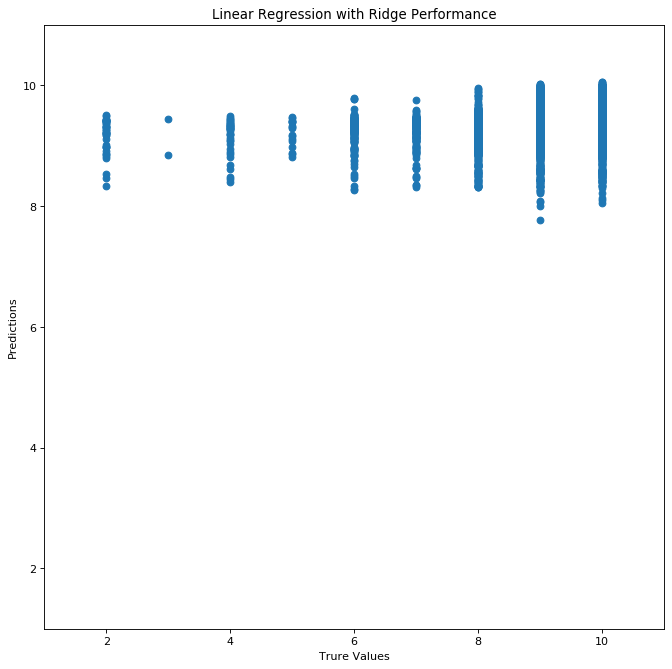

In [136]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(y_test_n, prediction_rr)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')
plt.ylim(1,11)
plt.xlim(1,11)
plt.title('Linear Regression with Ridge Performance')
plt.savefig('scatter1.pdf')

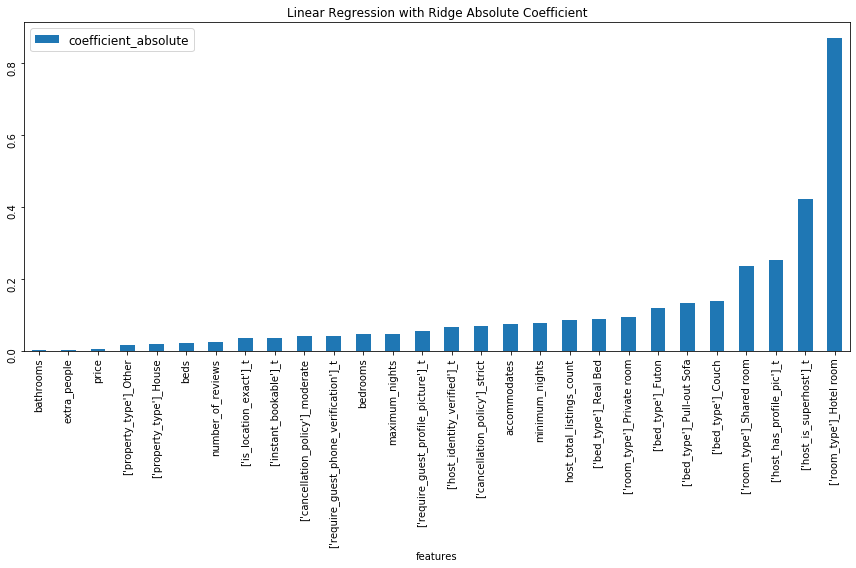

In [137]:
## Regularized Linear Regression Feature Importance
dfco = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(grid_rr.best_estimator_.coef_))], axis = 1)
dfco.columns = ['features','coefficient']
dfco['coefficient_absolute'] = dfco['coefficient'].abs()
dfco_sort = dfco.sort_values('coefficient_absolute', ascending = True)
dfco_sort.plot(kind = 'bar', y='coefficient_absolute', x='features', figsize=(12, 8),\
                          title ='Linear Regression with Ridge Absolute Coefficient', fontsize=10)
plt.yticks(rotation='vertical')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig('bar1.pdf')

In [144]:
# Grid Search for Random Forest
model_rf = RandomForestRegressor()
param_grid = {
    'bootstrap': [True],
    'n_estimators': [30, 64, 100],
    'max_depth': [5, 10],
    'max_features': [3, 5, 10],
}
grid_rf = GridSearchCV(model_rf, param_grid, cv=cv, scoring='neg_mean_squared_error')

In [145]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=8, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=N

In [146]:
print('best score: ',grid_rf.best_score_)

print('best rmse: ', math.sqrt(abs(grid_rf.best_score_)))

print('best parameter: ',grid_rf.best_params_)

print('best estimator: ',grid_rf.best_estimator_)

best score:  -0.7291986114380964
best rmse:  0.8539312685679664
best parameter:  {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 100}
best estimator:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [147]:
prediction_rf = grid_rf.predict(X_test)

In [148]:
errorrf= y_test_n - prediction_rf
rmse_rf_tune = math.sqrt(sum(np.square(errorrf))/len(errorrf))
rmse_rf_tune

0.8942617310599887

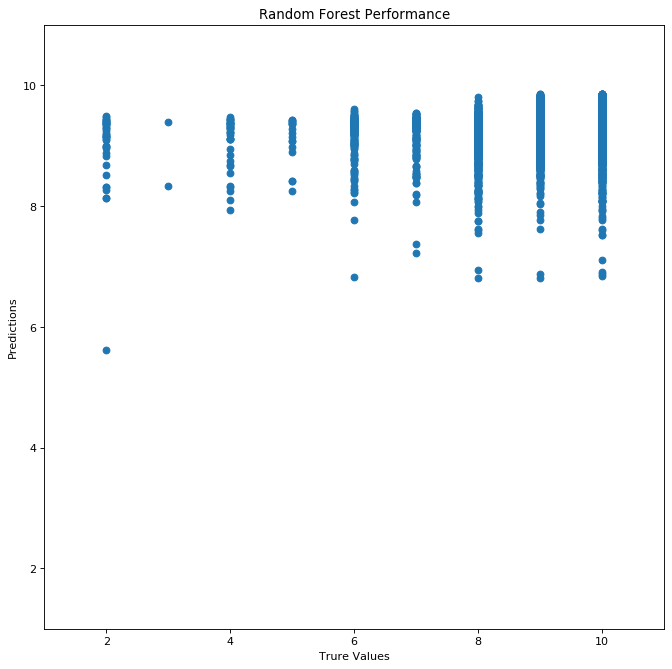

In [149]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(y_test_n, prediction_rf)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')
plt.ylim(1,11)
plt.xlim(1,11)
plt.title('Random Forest Performance')
plt.savefig('scatter2.pdf')

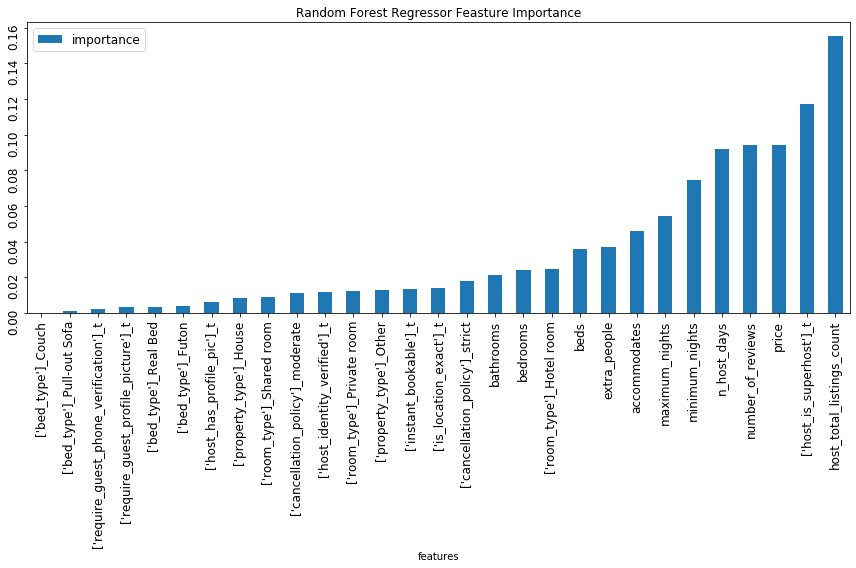

In [164]:
## Random Forest Feature Importance 
dfrf = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(grid_rf.best_estimator_.feature_importances_))], axis = 1)
dfrf.columns = ['features','importance']
dfrf_sort = dfrf.sort_values('importance', ascending = True)
dfrf_sort.plot(kind = 'bar', y='importance', x='features', figsize=(12, 8), \
                           title ='Random Forest Regressor Feasture Importance', fontsize=12)
plt.yticks(rotation='vertical')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig('bar2.pdf')

In [156]:
# Grid Search for Gradient Boost
model_gbt = GradientBoostingRegressor()
param_grid = {
    'learning_rate': [0.1, 0.5],
    'n_estimators': [100, 200],
    'max_depth': [2, 5],
    'max_features': [3, 5],
}
grid_gbt = GridSearchCV(model_gbt, param_grid, cv=10, scoring='neg_mean_squared_error')


In [157]:
grid_gbt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...hange=None,
                  

In [158]:
print('best score: ',grid_gbt.best_score_)

print('best rmse: ', math.sqrt(abs(grid_gbt.best_score_)))

print('best parameter: ',grid_gbt.best_params_)

print('best estimator: ',grid_gbt.best_estimator_)

best score:  -0.7295504159598211
best rmse:  0.8541372348515319
best parameter:  {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 5, 'n_estimators': 200}
best estimator:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=5, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [159]:
prediction_gbt = grid_gbt.predict(X_test)

In [160]:
errorgbt= y_test_n - prediction_gbt
rmse_gbt_tune = math.sqrt(sum(np.square(errorgbt))/len(errorgbt))
rmse_gbt_tune

0.895007183195917

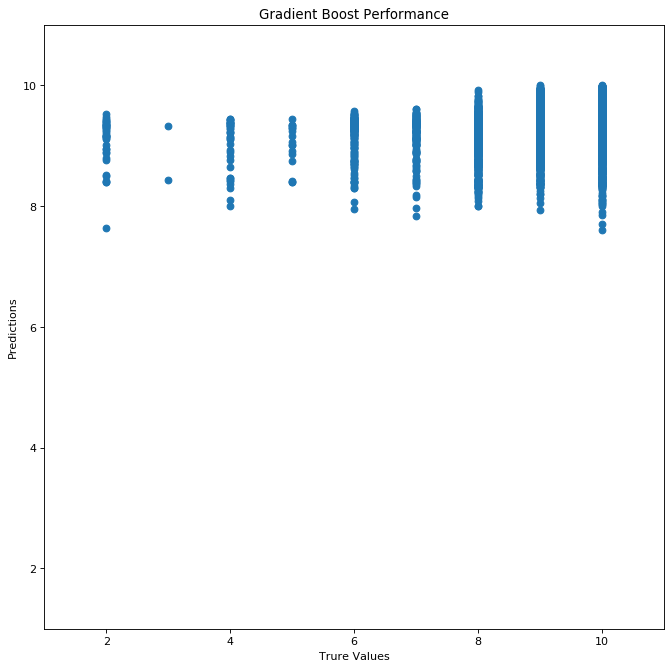

In [161]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(y_test_n, prediction_gbt)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')
plt.ylim(1,11)
plt.xlim(1,11)
plt.title('Gradient Boost Performance')
plt.savefig('scatter3.pdf')

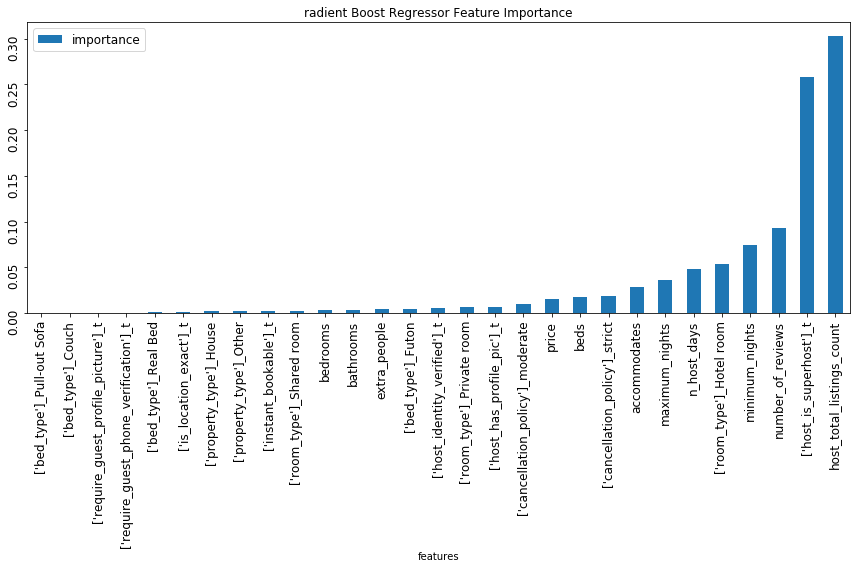

In [165]:
### Gradient Boost Regressor Feature Importance
dfgbtr = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(grid_gbt.best_estimator_.feature_importances_))], axis = 1)
dfgbtr.columns = ['features','importance']
dfgbtr_sort = dfgbtr.sort_values('importance', ascending = True)
dfgbtr_sort.plot(kind = 'bar', y='importance', x='features', figsize=(12, 8),\
                             title ='radient Boost Regressor Feature Importance', fontsize=12)
plt.yticks(rotation='vertical')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig('bar3.pdf')